# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, SGDRegressor

# Dataset

### Load Dataset

In [2]:
df = pd.read_csv('data/usa-housing-train-preprocessed.csv')

### Split x & y

In [3]:
train_set = np.array(df)[:, 1:]
x_train = train_set[:, 0:5]
y_train = train_set[:, [5]]
x_train.shape, y_train.shape

((3500, 5), (3500, 1))

### Visualize

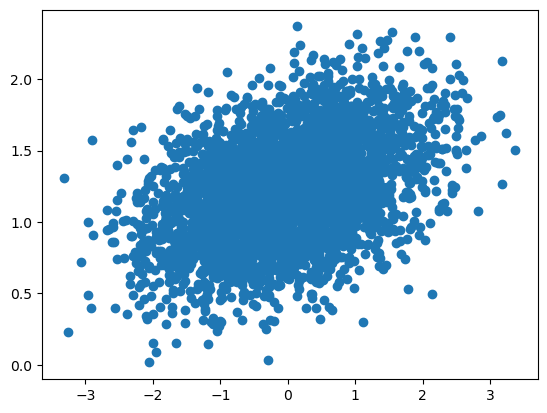

In [4]:
plt.scatter(x_train[:, 4], y_train)

In [5]:
n, m = x_train.shape
x_train = np.hstack((np.ones((n, 1)), x_train))
x_train.shape, y_train.shape

((3500, 6), (3500, 1))

# Utils

In [6]:
def multiple_linear_regression(x, w):
    y_hat = x @ w
    return y_hat

In [7]:
def gradient(x, y, y_hat):
    grads = 2*(x.T @ (y_hat - y)) / x.shape[0]
    return grads

In [8]:
def gradient_descent(w, eta, grads):
    w -= eta*grads
    return w

In [9]:
def mse(y, y_hat):
    loss = np.mean((y - y_hat)**2)
    return loss

In [10]:
def mae(y, y_hat):
    loss = np.mean(np.abs(y - y_hat))
    return loss

In [11]:
def r2(y, y_hat):
    return 1 - np.sum((y - y_hat)**2) / np.sum((y - y.mean())**2)

# Model Train

In [12]:
w = np.random.randn(m+1, 1)
print(w.shape)
eta = 0.01
n_epochs = 2000

(6, 1)


In [13]:
error_hist = []

for epoch in range(n_epochs):
    y_hat = multiple_linear_regression(x_train, w)

    e = mse(y_train, y_hat)
    error_hist.append(e)
    
    grads = gradient(x_train, y_train, y_hat)
    
    w = gradient_descent(w, eta, grads)
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch={epoch}, \t E={e:.4}')

Epoch=99, 	 E=0.4152
Epoch=199, 	 E=0.02798
Epoch=299, 	 E=0.0119
Epoch=399, 	 E=0.01047
Epoch=499, 	 E=0.01031
Epoch=599, 	 E=0.01029
Epoch=699, 	 E=0.01029
Epoch=799, 	 E=0.01029
Epoch=899, 	 E=0.01029
Epoch=999, 	 E=0.01029
Epoch=1099, 	 E=0.01029
Epoch=1199, 	 E=0.01029
Epoch=1299, 	 E=0.01029
Epoch=1399, 	 E=0.01029
Epoch=1499, 	 E=0.01029
Epoch=1599, 	 E=0.01029
Epoch=1699, 	 E=0.01029
Epoch=1799, 	 E=0.01029
Epoch=1899, 	 E=0.01029
Epoch=1999, 	 E=0.01029


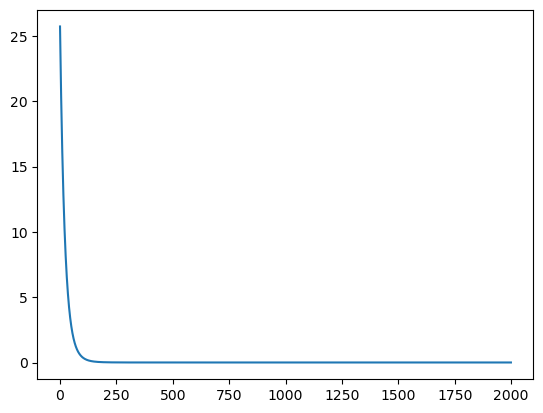

In [14]:
plt.plot(error_hist)

# Evaluation

In [15]:
df = pd.read_csv('data/usa-housing-test-preprocessed.csv')
df

,Unnamed: 0,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,0,-0.626402,1.049688,-0.544415,-0.592643,0.772362,1.339096
1,1,-1.071876,0.924024,-0.065882,-0.689887,0.735908,1.251794
2,2,0.150858,0.774526,-0.323371,-1.597494,-0.700113,1.340095
3,3,0.068846,0.326005,0.880735,0.242031,-1.180424,1.431508
4,4,0.413663,-2.586713,-0.490897,-1.216623,1.457277,1.042374
...,...,...,...,...,...,...,...
1495,1495,0.527827,0.285023,1.669355,-0.487296,-1.073708,1.348222
1496,1496,0.237333,-0.367723,0.429290,0.225824,-1.212042,1.309937
1497,1497,-0.461457,0.758438,0.740920,-0.446778,0.792588,1.472887
1498,1498,-1.173811,0.604738,-0.028572,0.339275,2.819862,1.409762


In [17]:
test_set = np.array(df)[:, 1:]
x_test = test_set[:, 0:5]
y_test = test_set[:, [5]]

In [18]:
n, m = x_test.shape
x_test = np.hstack((np.ones((n, 1)), x_test))
x_test.shape, y_test.shape

((1500, 6), (1500, 1))

In [19]:
y_hat_test = multiple_linear_regression(x_test, w)

In [20]:
mae(y_test, y_hat_test)

0.08113556609315789

# Linear Regression (scikit)

In [24]:
model = LinearRegression()

In [25]:
model.fit(x_train, y_train)

LinearRegression()

In [26]:
model.score(x_train, y_train)

0.9192986579053273

# SGD Regressor (scikit)

In [21]:
model = SGDRegressor(verbose=1, eta0=0.1, tol=1e-5)

In [22]:
model.fit(x_train, y_train)

-- Epoch 1
Norm: 0.71, NNZs: 6, Bias: 0.618683, T: 3500, Avg. loss: 0.006558
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.71, NNZs: 6, Bias: 0.628427, T: 7000, Avg. loss: 0.005384
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.70, NNZs: 6, Bias: 0.619949, T: 10500, Avg. loss: 0.005374
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.71, NNZs: 6, Bias: 0.627959, T: 14000, Avg. loss: 0.005314
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.70, NNZs: 6, Bias: 0.625038, T: 17500, Avg. loss: 0.005277
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.70, NNZs: 6, Bias: 0.620118, T: 21000, Avg. loss: 0.005294
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 0.70, NNZs: 6, Bias: 0.624700, T: 24500, Avg. loss: 0.005324
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 0.70, NNZs: 6, Bias: 0.624172, T: 28000, Avg. loss: 0.005300
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 0.70, NNZs: 6, Bias: 0.628783, T: 31500, Avg. loss: 0.005302
Total training time:

D:\anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(eta0=0.1, tol=1e-05, verbose=1)

In [23]:
model.score(x_train, y_train)

0.9185739368035077